In [1]:
import pandas as pd
import numpy as np
import auto_ts as AT

Imported Auto_Timeseries version: 0.0.14. Call by using:
        auto_ts.Auto_Timeseries(trainfile, ts_column,
                            sep=',', target=None, score_type='rmse', forecast_period=2,
                            timeinterval='Month', non_seasonal_pdq=None, seasonality=False,
                            seasonal_period=12, seasonal_PDQ=None,
                            verbose=0)
    To get detailed charts of actuals and forecasts, set verbose = 1


In [2]:
datapath = 'example_datasets/'
filename1 = 'Google_Stock_Price_Train.csv'
filename2 = 'energy_dataset.csv'

In [3]:
train = pd.read_csv(datapath+filename1,index_col=None)
print(train.shape)
train.head(1)

(1258, 6)


,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"


In [4]:
train['Close'] = train['Close'].str.replace(',', '').astype(np.float32)
train['Volume'] = train['Volume'].str.replace(',', '').astype(np.float32)

In [5]:
#dft = dft.iloc[::48,]
dft = train[:1000]
print(dft.shape)
dft.head()

(1000, 6)


,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.590027,7380500.0
1,1/4/2012,331.27,333.87,329.08,666.450012,5749400.0
2,1/5/2012,329.83,330.75,326.89,657.210022,6590300.0
3,1/6/2012,328.34,328.77,323.68,648.239990,5405900.0
4,1/9/2012,322.04,322.29,309.46,620.760010,11688800.0


In [6]:
ts_column = 'Date'
sep = ','
target = 'Close'
dft[[ts_column,target]].isnull().sum()

Date     0
Close    0
dtype: int64

In [7]:
score_type = 'rmse'
forecast_period = 5
timeinterval = 'Daily'
non_seasonal_pdq = (3, 1, 3)
seasonality = True
seasonal_periods = 24

Dataframe given as input. Analyzing Time Series data...
    Target variable = Close
Time Interval is given as Daily

Running Facebook Prophet Model...
    Fit-Predict data (shape=(1000, 2)) with Confidence Interval = 0.95...


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Building Forecast dataframe. Forecast Period = 5


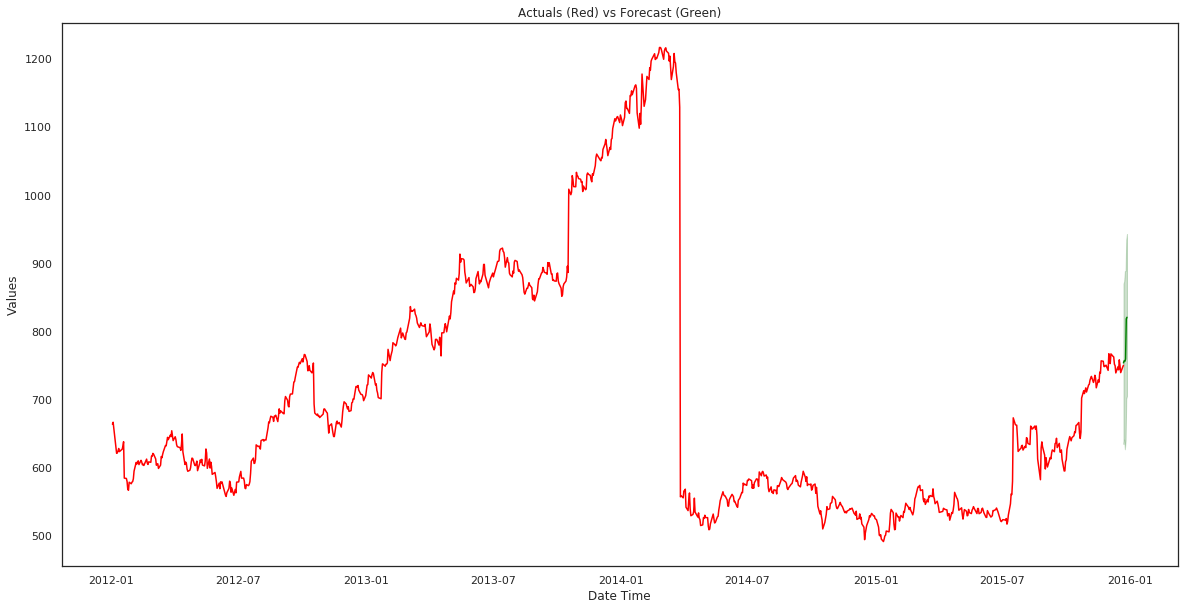

    RMSE = 3.62
    Std Deviation of Originals = 183.13
    Normalized RMSE = 2%

Best Model is:
    FB_Prophet
    Best Model Score: 3.62


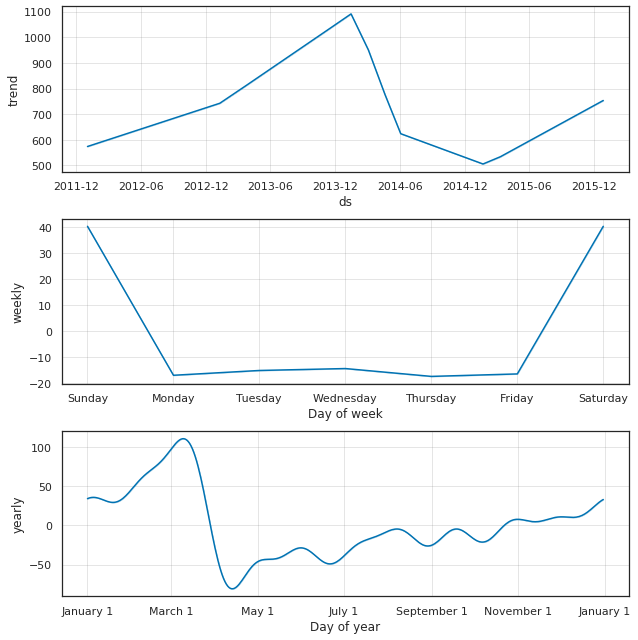

In [8]:
mldict = AT.Auto_Timeseries(dft, ts_column,
                            sep, target, score_type, forecast_period,
                            timeinterval, non_seasonal_pdq, seasonality=seasonality,
                            seasonal_period=seasonal_periods, seasonal_PDQ=None, conf_int=0.95, 
                            model_type="prophet", verbose=1)

Dataframe given as input. Analyzing Time Series data...
    Target variable = Close
Time Interval is given as Daily

Running PyFlux Model...
Data Set split into train (995, 5) and test (5, 5) for Cross Validation Purposes
Cycling through various (p,d,q) parameters
................................
Best Params Selected (based on rmse): (2, 0, 0)


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


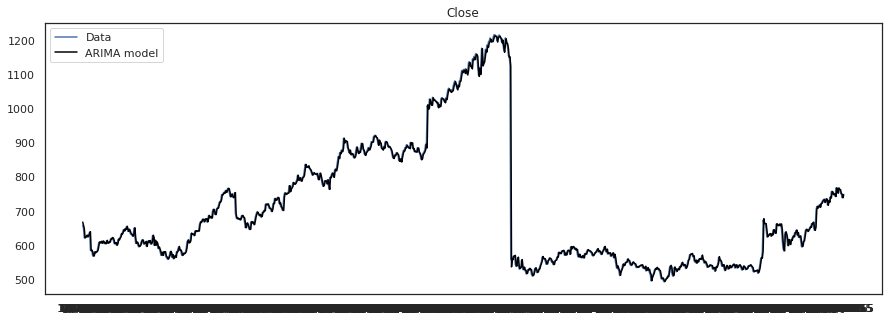

Normal ARIMA(2,0,0)                                                                                       
======================================================= ==================================================
Dependent Variable: Close                               Method: MLE                                       
Start Date: 1/5/2012                                    Log Likelihood: -4432.3203                        
End Date: 12/15/2015                                    AIC: 8872.6406                                    
Number of observations: 993                             BIC: 8892.2435                                    
Latent Variable                          Estimate   Std Error  z        P>|z|    95% C.I.                 
======================================== ========== ========== ======== ======== =========================
Constant                                 4.8848     2.6458     1.8463   0.0649   (-0.3009 | 10.0705)      
AR(1)                                

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should

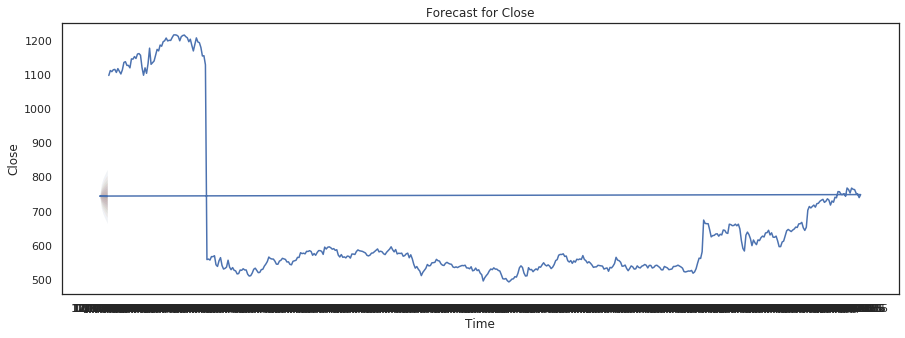

Dynamic 5-period Forecasts:
    RMSE = 8.60
    Std Deviation of Originals = 183.56
    Normalized RMSE = 5%

Running Non Seasonal ARIMA Model...
Data Set split into train (995,) and test (5,) for Cross Validation Purposes

Differencing = 0
 Iteration 0 completed...
 Iteration 10 completed...
    Best AR order p = 1, MA order q = 0, Interim metric = 8892.394

Differencing = 1
 Iteration 20 completed...
 Iteration 30 completed...
    Best AR order p = 0, MA order q = 0, Interim metric = 8881.401

Best model is: Non Seasonal ARIMA(0,1,0), aic = 8881.401
####    Fitting best model for full data set now. Will take time... ######
Static Forecasts:
    ARIMA model error: predictions not available.

Running Seasonal SARIMAX Model...
Data Set split into train (995,) and test (5,) for Cross Validation Purposes
Building a Seasonal Model...

    Finding best Non-Seasonal pdq Parameters:

Differencing = 0
    Iteration 0 completed...
    Best AR order p = 1, MA order q = 3, Interim metric = 8861.6

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


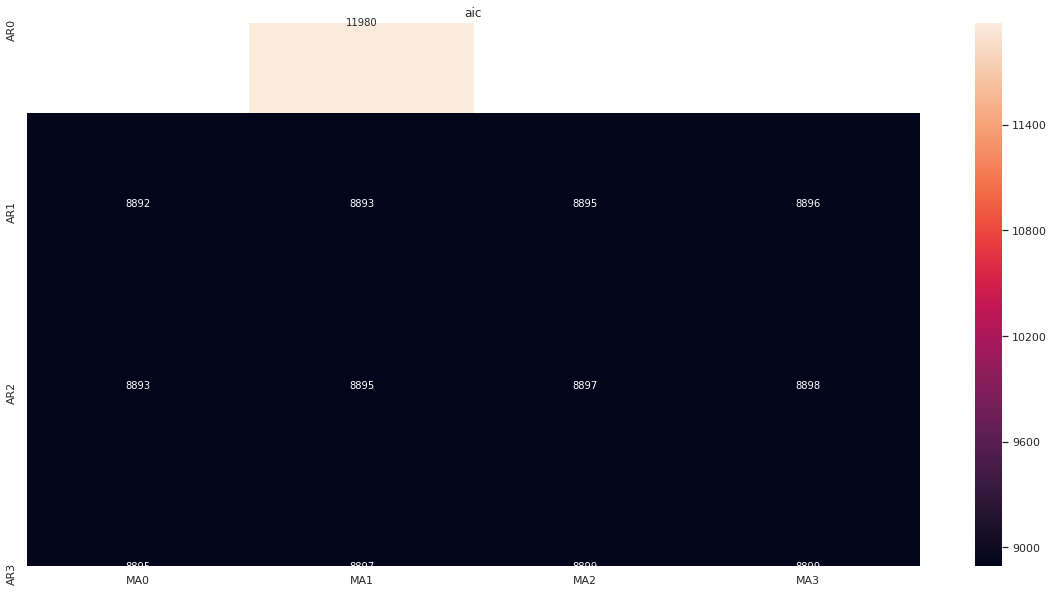

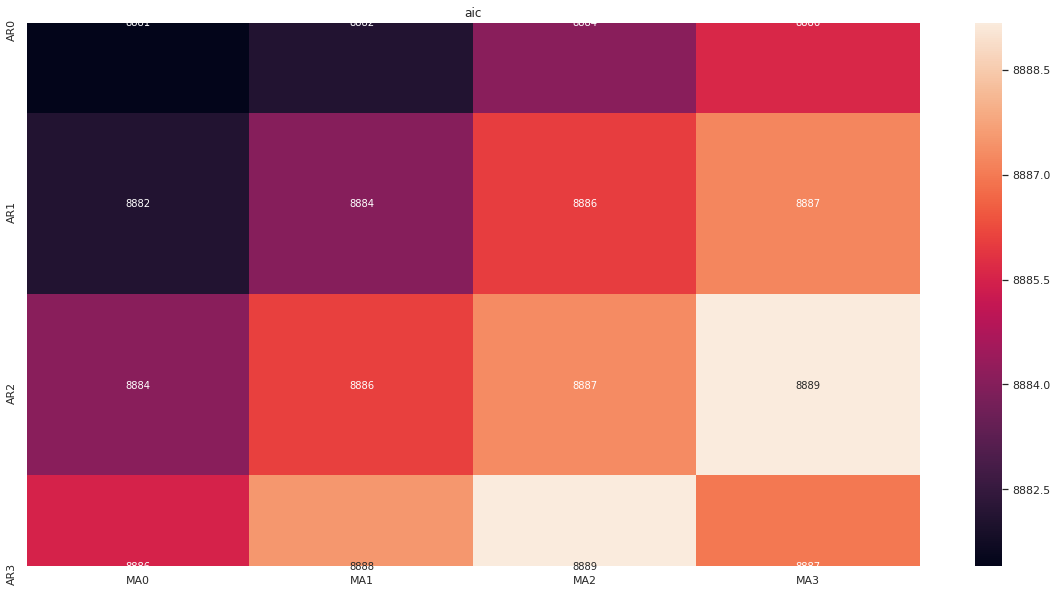

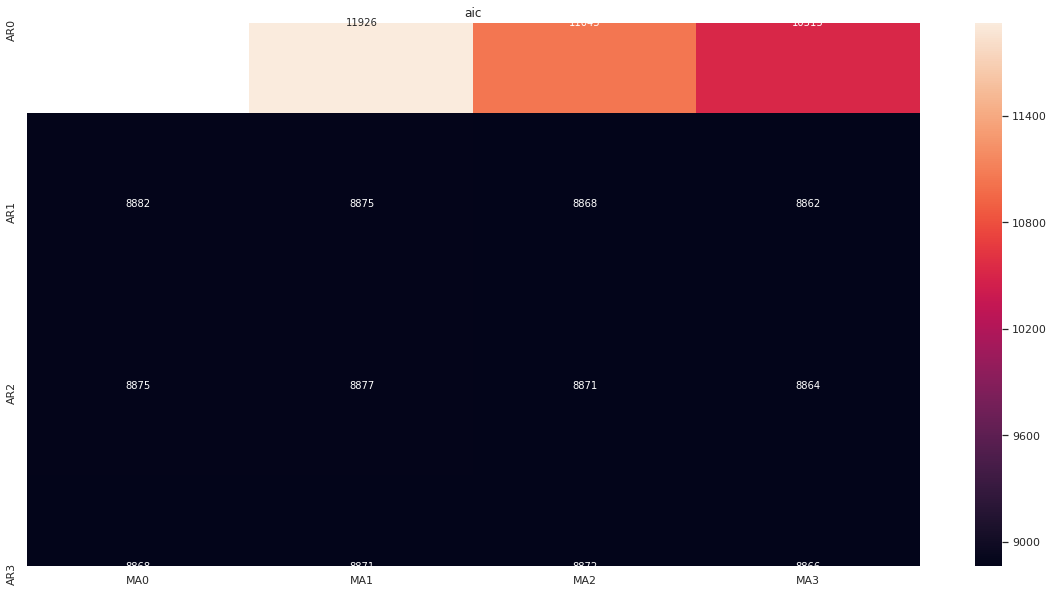

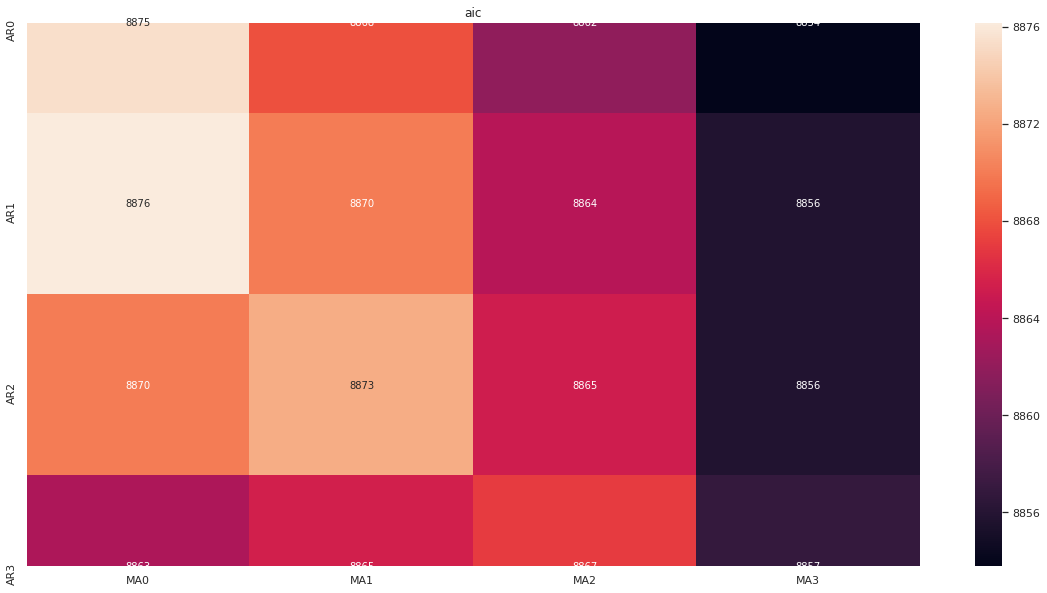

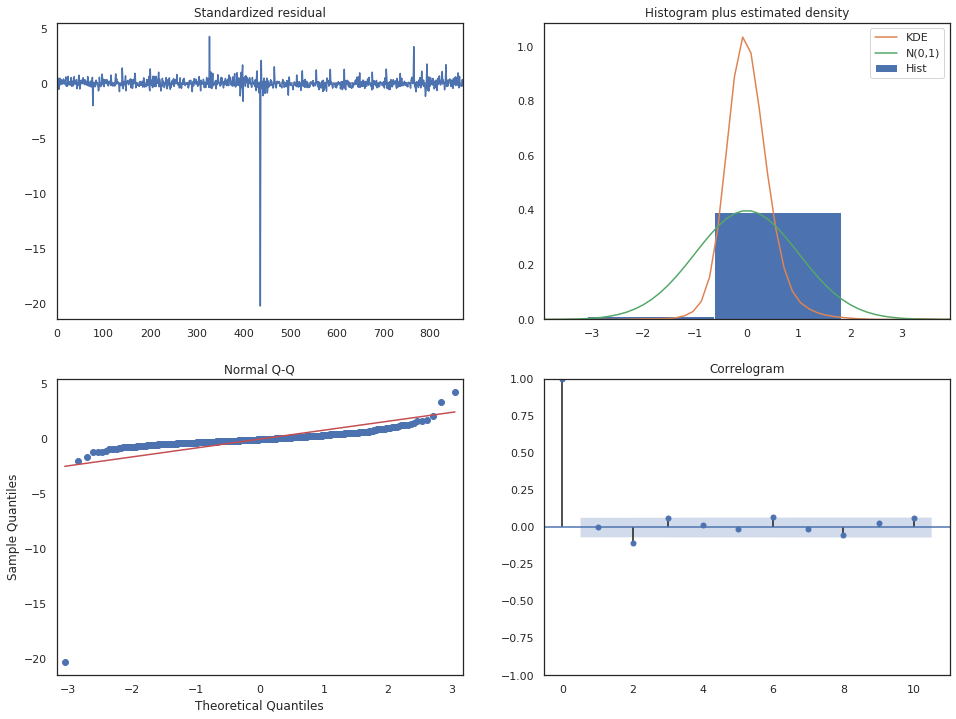

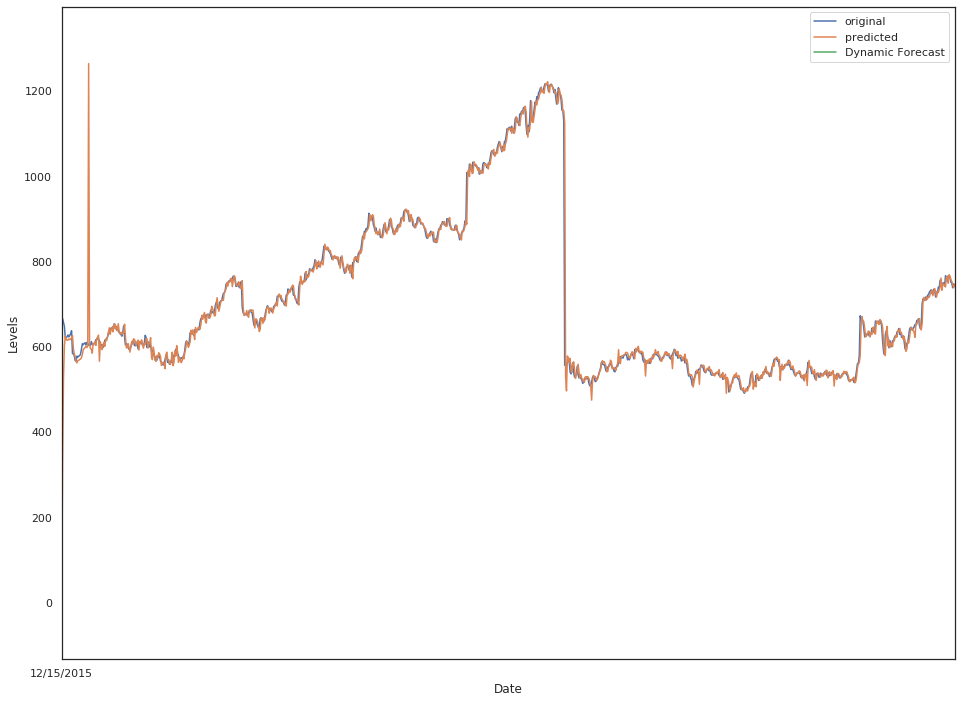

                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                  995
Model:             SARIMAX(1, 0, 3)x(0, 1, 3, 30)   Log Likelihood               -4009.657
Date:                            Sat, 01 Feb 2020   AIC                           8039.313
Time:                                    21:52:14   BIC                           8087.010
Sample:                                         0   HQIC                          8057.562
                                            - 995                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1354      1.352      0.100      0.920      -2.515       2.786
drift         -0.0004      0.002   

In [9]:
mldict = AT.Auto_Timeseries(dft, ts_column,
                            sep, target, score_type, forecast_period,
                            timeinterval, non_seasonal_pdq, seasonality=seasonality,
                            seasonal_period=seasonal_periods, seasonal_PDQ=None, conf_int=0.95, 
                            model_type="stats", verbose=1)

Dataframe given as input. Analyzing Time Series data...
    Target variable = Close
Time Interval is given as Daily

Running Machine Learning Models...
    Shifting 4 predictors by lag=4 to align prior predictor with current target...

Instance Based = 1.2455 
Boosting = 1.2531
Linear Model = 1.6687 
Bagging = 1.4883
    Best Model = SVR with 1.25 Normalized RMSE score

    RMSE = 119.45
    Std Deviation of Originals = 183.81
    Normalized RMSE = 65%


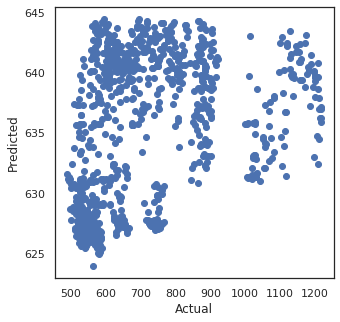

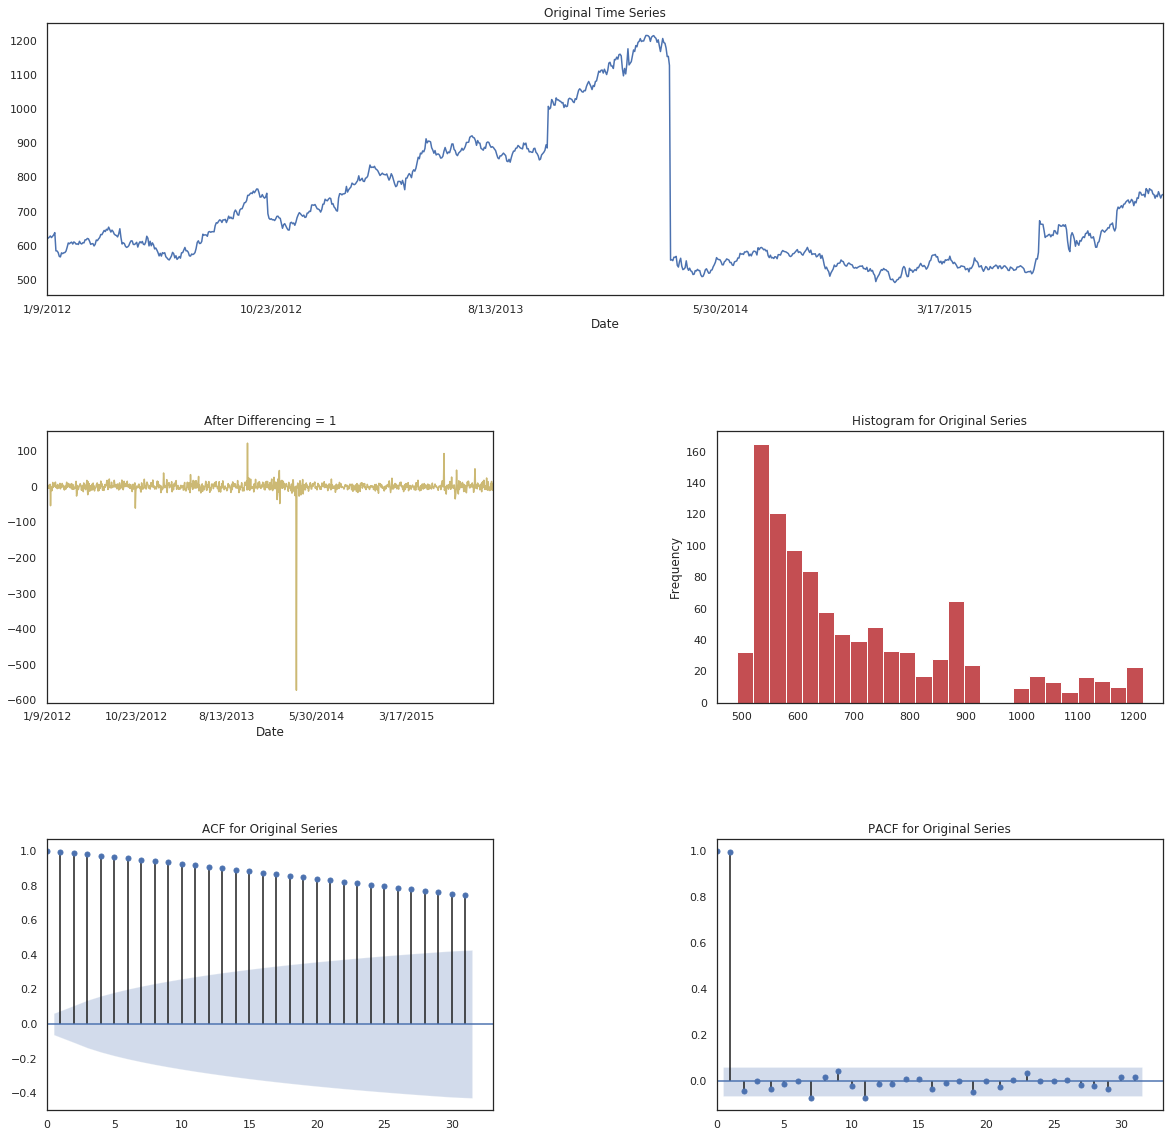


Best Model is:
    ML
    Best Model Score: 119.45


In [10]:
mldict = AT.Auto_Timeseries(dft, ts_column,
                            sep, target, score_type, forecast_period,
                            timeinterval, non_seasonal_pdq, seasonality=seasonality,
                            seasonal_period=seasonal_periods, seasonal_PDQ=None, conf_int=0.95, 
                            model_type="ml", verbose=1)